In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

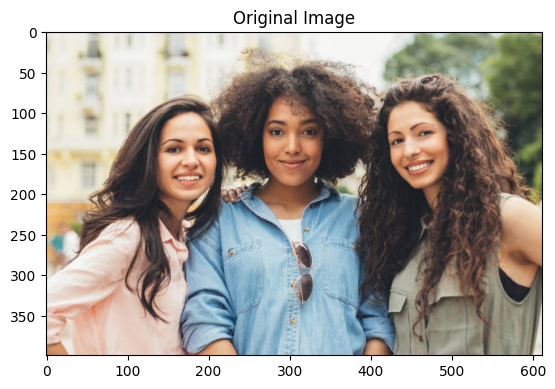

In [2]:
img = cv2.imread('./data/friends.jpg')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

In [3]:
# load cascade classifier
haar = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

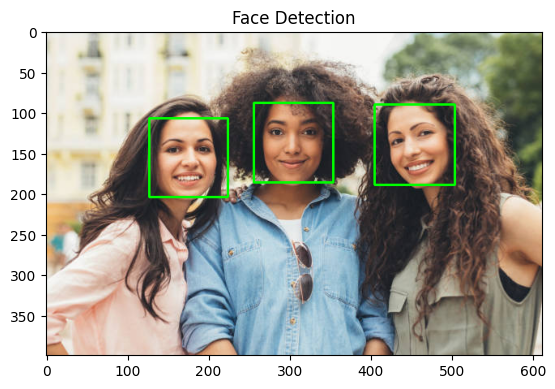

In [4]:
image = img.copy()

# step-1: convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# step-2: apply grayscale image to cascade classifier
face_rect = haar.detectMultiScale(gray,1.3,5) # 1.3 is scaling factor, 5 is minimum neighbour, where scaling factor is used to reduce the size of the image at each image scale, and minimum neighbour is used to specify how many neighbours each candidate rectangle should have to retain it.
# step -3: draw bounding box
for x,y,w,h in face_rect:
    cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    
    
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Face Detection')
plt.show()

### Real Time Face Detection using OpenCV

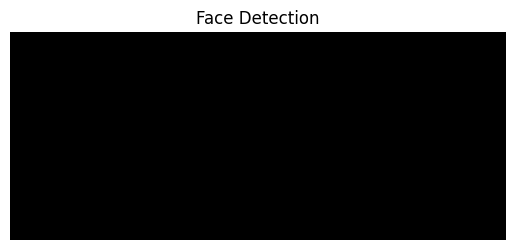

In [6]:
import cv2
import matplotlib.pyplot as plt
from IPython import display
import time

def display_frame(frame):
    plt.clf()
    plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    plt.axis('off')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
cap = cv2.VideoCapture('./data/video.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
        
    image = frame.copy()

    # step-1: convert image to grayscale
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # step-2: apply grayscale image to cascade classifier
    face_rect = haar.detectMultiScale(gray,1.3,5)
    # step -3: draw bounding box
    for x,y,w,h in face_rect:
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
    
    # Replace cv2.imshow and cv2.waitKey with matplotlib display
    display_frame(image)
    
    # Add small delay to control frame rate
    time.sleep(0.1)
    
    # Check for keyboard interrupt
    try:
        if plt.waitforbuttonpress(0.01):  # Returns True if button is pressed
            break
    except Exception:
        break

cap.release()
plt.close('all')

---
## END